<a href="https://colab.research.google.com/github/brunocu/DataScience/blob/master/MLintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

> Al trabajar en **Jupyter** usar `%matplotlib notebook` para visualizar gráficas interactivas o `%matplot inline`. En Python normal `plt.show`

> Quieres ver este archivo en [nbviewer](https://nbviewer.jupyter.org/github/brunocu/DataScience/blob/master/MLintro.ipynb)?

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## Numpy

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fnumfocus.org%2Fwp-content%2Fuploads%2F2016%2F07%2Fnumpy-logo-300.png&f=1" alt="Numpy" height="80">


```python
import numpy as np
```

Principal función de Numpy: Introduce arrays (matrices)

**Arrays**: Contenedor eficiente en memoria que proporciona operaciones numéricas rápidas.

Ejemplos de uso de matrices en Machine Learning:

- Valores de un experimento/simulación en pasos de tiempo discretos.
- Señal registrada por un dispositivo de medición, por ejemplo, una onda sonora.
- Píxeles de una imagen, nivel de gris o color.
- Datos 3D medidos en diferentes posiciones XYZ.

### Creación de Arrays

#### Espaciados uniformemente

In [0]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

#### Por cantidad de puntos

In [0]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

#### Matrices comunes

In [0]:
d = np.ones((3, 3))    # Matriz de (n, m) tamaño llena de 1
d

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [0]:
e = np.zeros((2, 2))    # Matriz de (n, m) tamaño llena de 0 (Matriz cero)
e

array([[0., 0.],
       [0., 0.]])

In [0]:
f = np.eye(3)    # Matriz identidad
f

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [0]:
g = np.diag(np.array([1, 2, 3, 4]))    # Array diagonal que toma otra array como input
g

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [0]:
h = np.random.rand(4)    # Matriz 1D con 4 valores al azar [0,1]
h

array([0.95595123, 0.26862446, 0.00926042, 0.5810484 ])

### Ejemplo: 1D Array

In [0]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [0]:
a.ndim

1

In [0]:
a.shape

(4,)

In [0]:
len(a)

4

### Ejemplo: 2D, 3D Array

In [0]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array (array de arrays)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [0]:
b.ndim

2

In [0]:
b.shape

(2, 3)

In [0]:

len(b)    # regresa el tamaño de la "primera" dimensión

2

### Operaciones con matrices

> Todas las operaciones aritméticas con escalares se maneja por elementos.

In [0]:
a = np.array([1, 2, 3, 4])

In [38]:
a + 1    # Suma de una matriz y un escalar

array([2, 3, 4, 5])

In [39]:
a * 5    # Producto por un escalar

array([ 5, 10, 15, 20])

In [40]:
a**2    # Matriz elevado a un escalar

array([ 1,  4,  9, 16])

In [41]:
2**a    # Escalar elevado a una matriz

array([ 2,  4,  8, 16])

**Multiplicación de arrays NO es lo mismo que multiplicación de matrices**

En Numpy, al multiplicar `array * array` se limita a multiplicar los valores que se encuentran en la misma posición.

In [46]:
b = np.ones((3,3))
b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [47]:
b * b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [48]:
b.dot(b)    # Multiplicación de Matrices

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

> `numpy.linalg` implementa álgebra lineal básica, como la resolución de sistemas lineales, descomposición de valores singulares, etc.

## Array Visualization (with matplotlib)

### 1D Plotting

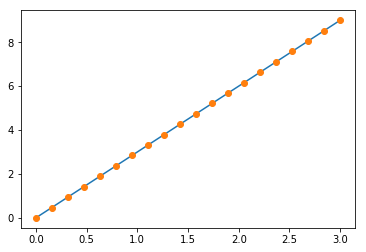

In [0]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

plt.plot(x, y, 'o')  # dot plot

### 2D Plot

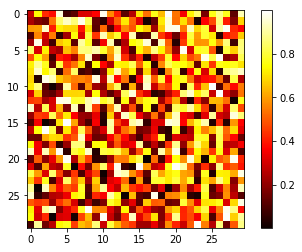

In [51]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    

plt.colorbar()

## Ejemplo: Difusión mediante un algoritmo de desplazamiento aleatorio

Consideremos un simple proceso de salto aleatorio en 1D: en cada paso un "caminante" salta a la derecha o a la izquierda con igual probabilidad.

Estamos interesados en encontrar la distancia típica desde el origen de un caminante al azar después de `t` saltos a la izquierda o a la derecha. Vamos a simular a muchos "caminantes" para encontrar esta ley, usando computación en array: vamos a crear un array 2D con las "historias" (cada caminante tiene una historia) en una dirección, y el tiempo en la otra:

In [56]:
n_stories = 1000 # número de caminantes
t_max = 200      # tiempo en el que seguimos al caminante

t = np.arange(t_max)
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1

np.random.randint(0,1+1, (n_stories, t_max))

np.unique(steps)    # Regresa todos los valores únicos de nuestro array. Verificar que todos sean -1 ó 1

array([-1,  1])

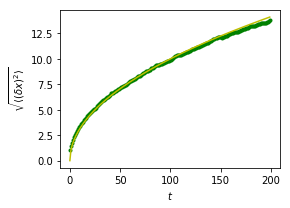

In [59]:
# Construimos las caminatas sumando pasos a lo largo del tiempo:
positions = np.cumsum(steps, axis=1)   # axis = 1: tiempo
sq_distance = positions**2

# Obtenemos la media en el eje de las historias:
mean_sq_distance = np.mean(sq_distance, axis=0)

# Y graficamos los resultados
plt.figure(figsize=(4, 3)) 

plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 

plt.xlabel(r"$t$") 

plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 

plt.tight_layout()